In [1]:
import pandas as pd
df = pd.read_csv('amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [2]:
columns_to_extract = ['overall', 'reviewText'] 
review_df = df[columns_to_extract]


review_df.to_csv('review.csv', index=False)

In [3]:
review_df.head(3)

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...


In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


def clean_text(text):
    if isinstance(text, float):  
        text = ''
    
       # Remove newline and carriage return characters
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\r', ' ', text)
    
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower().strip()
    
   # Tokenize and remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join(word for word in words if word not in stop_words)
    
    return text


# Apply the cleaning function to the review text
review_df['reviewText'] = review_df['reviewText'].fillna('').astype(str)

review_df['cleaned_text'] = review_df['reviewText'].apply(clean_text)
# Display the DataFrame with cleaned text
review_df.head(3)


C:\Users\rishi\AppData\Local\Temp\ipykernel_7180\1364627635.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['reviewText'] = review_df['reviewText'].fillna('').astype(str)
C:\Users\rishi\AppData\Local\Temp\ipykernel_7180\1364627635.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['cleaned_text'] = review_df['reviewText'].apply(clean_text)


,overall,reviewText,cleaned_text
0,4.0,No issues.,issues
1,5.0,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...
2,4.0,it works as expected. I should have sprung for...,works expected sprung higher capacity think ma...


In [5]:
from textblob import TextBlob

# Function to get the sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment function to the cleaned text column
review_df['sentiment'] = review_df['cleaned_text'].apply(get_sentiment)

# Categorize the sentiment polarity into positive, negative, and neutral
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

review_df['sentiment_category'] = review_df['sentiment'].apply(categorize_sentiment)

# Display the first few rows of the dataset with sentiments
review_df.head(3)


C:\Users\rishi\AppData\Local\Temp\ipykernel_7180\31556868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['sentiment'] = review_df['cleaned_text'].apply(get_sentiment)
C:\Users\rishi\AppData\Local\Temp\ipykernel_7180\31556868.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['sentiment_category'] = review_df['sentiment'].apply(categorize_sentiment)


,overall,reviewText,cleaned_text,sentiment,sentiment_category
0,4.0,No issues.,issues,0.000000,neutral
1,5.0,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...,-0.100000,negative
2,4.0,it works as expected. I should have sprung for...,works expected sprung higher capacity think ma...,0.129167,positive


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data for training
X = review_df['cleaned_text']
y = review_df['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict sentiments on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8351983723296033
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.06      0.10       199
     neutral       1.00      0.01      0.03       136
    positive       0.83      1.00      0.91      1631

    accuracy                           0.84      1966
   macro avg       0.89      0.36      0.35      1966
weighted avg       0.85      0.84      0.77      1966



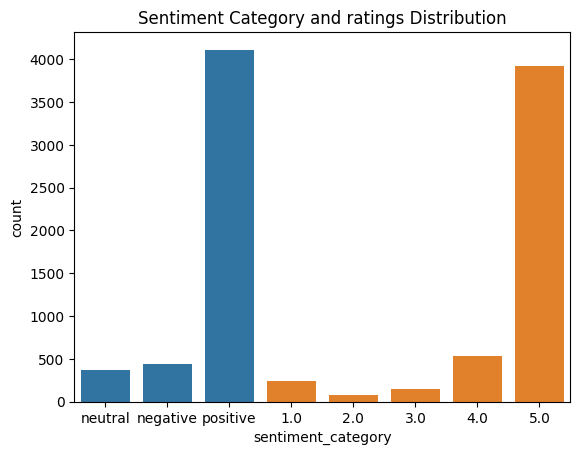

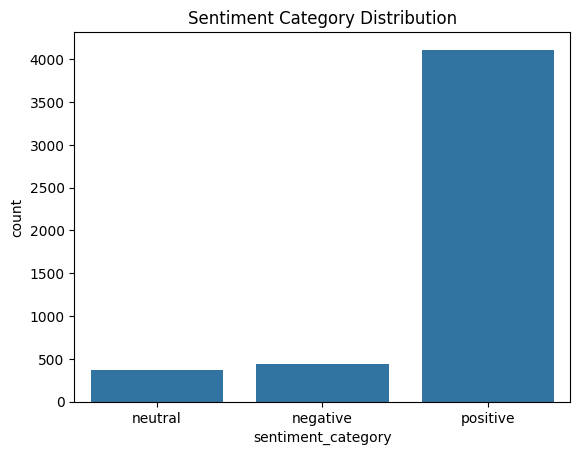

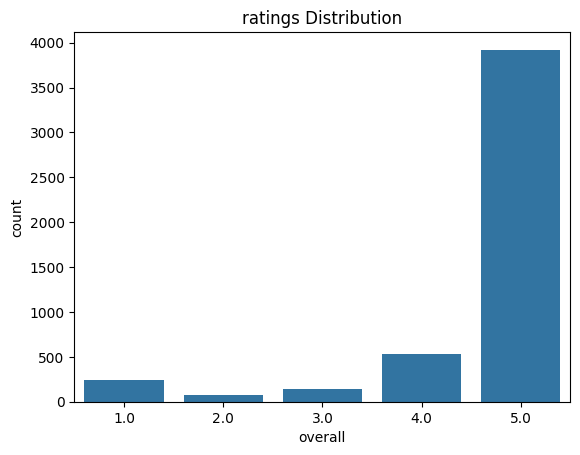

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot sentiment category distribution
sns.countplot(x='sentiment_category', data=review_df)
sns.countplot(x='overall', data=review_df)
plt.title('Sentiment Category and ratings Distribution')
plt.show()

sns.countplot(x='sentiment_category', data=review_df)
plt.title('Sentiment Category Distribution')
plt.show()

sns.countplot(x='overall', data=review_df)
plt.title('ratings Distribution')
plt.show()


In [8]:
def predict_sentiment(user_input):
    cleaned_input = clean_text(user_input)
    input_tfidf = vectorizer.transform([cleaned_input])
    prediction = model.predict(input_tfidf)
    return prediction[0]

In [9]:
while True:
    user_input = input("Enter a comment (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_input)
    print(f"The sentiment of the comment is: {sentiment}")

The sentiment of the comment is: positive
The sentiment of the comment is: negative
